In [1]:
import sympy as sp
import gEconpy as ge
import gEconpy.plotting as gp

In [2]:
mod = ge.model_from_gcn("../GCN Files/RBC_two_household.gcn")

Model Building Complete.
Found:
	16 equations
	16 variables
	The following variables were eliminated at user request:
		TC_t,U_NR_t,U_R_t
	The following "variables" were defined as constants and have been substituted away:
		mc_t
	2 stochastic shocks
		 0 / 2 has a defined prior. 
	8 parameters
		 0 / 8 has a defined prior. 
	0 parameters to calibrate.
Model appears well defined and ready to proceed to solving.



In [3]:
ss_res, success = mod.steady_state(how="root")
A, B, C, D = mod.linearize_model()

In [4]:
ge.bk_condition(mod, steady_state_dict=ss_res)

Model solution has 3 eigenvalues greater than one in modulus and 3 forward-looking variables. 
Blanchard-Kahn condition is satisfied.


,Modulus,Real,Imaginary
0,2.200060e-34,2.200060e-34,0.0
1,5.713902e-34,-5.713902e-34,0.0
2,3.256708e-23,3.256708e-23,0.0
3,2.746607e-21,2.746607e-21,0.0
4,1.119252e-20,1.119252e-20,0.0
5,5.364728e-19,-5.364728e-19,0.0
6,6.219867e-19,6.219867e-19,0.0
7,6.718274e-19,-6.718274e-19,0.0
8,1.094915e-18,1.094915e-18,0.0
9,1.471713e-18,1.471713e-18,0.0


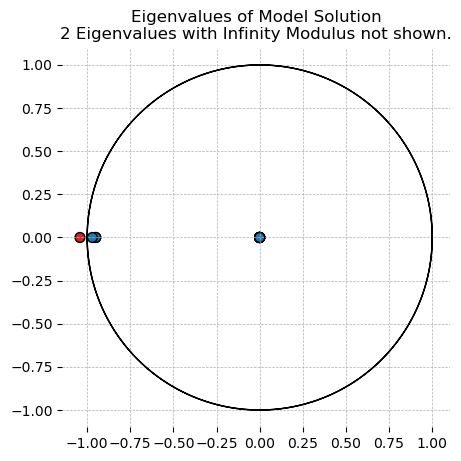

In [5]:
gp.plot_eigenvalues(mod, A=A, B=B, C=C, D=D);

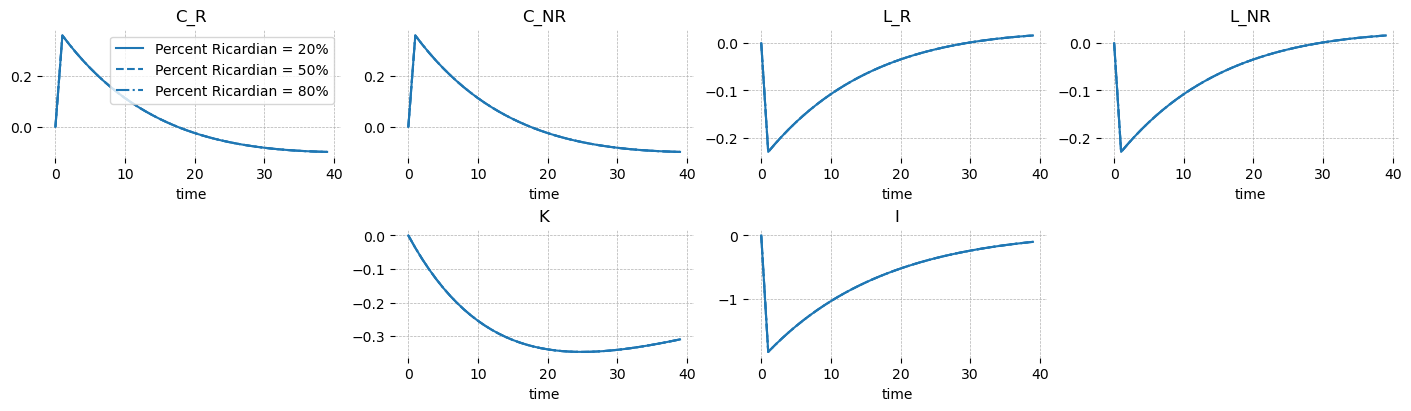

In [6]:
gp.plot_irf(
    {
        f"Percent Ricardian = {alpha_L:0.0%}": ge.impulse_response_function(
            mod,
            shock_size={"epsilon_beta_R": 1.0},
            verbose=False,
            alpha_L=alpha_L,
            steady_state_kwargs={"how": "root", "verbose": False, "progressbar": False},
        )
        for alpha_L in [0.2, 0.5, 0.8]
    },
    ["C_R", "C_NR", "L_R", "L_NR", "K", "I"],
    figsize=(14, 4),
);

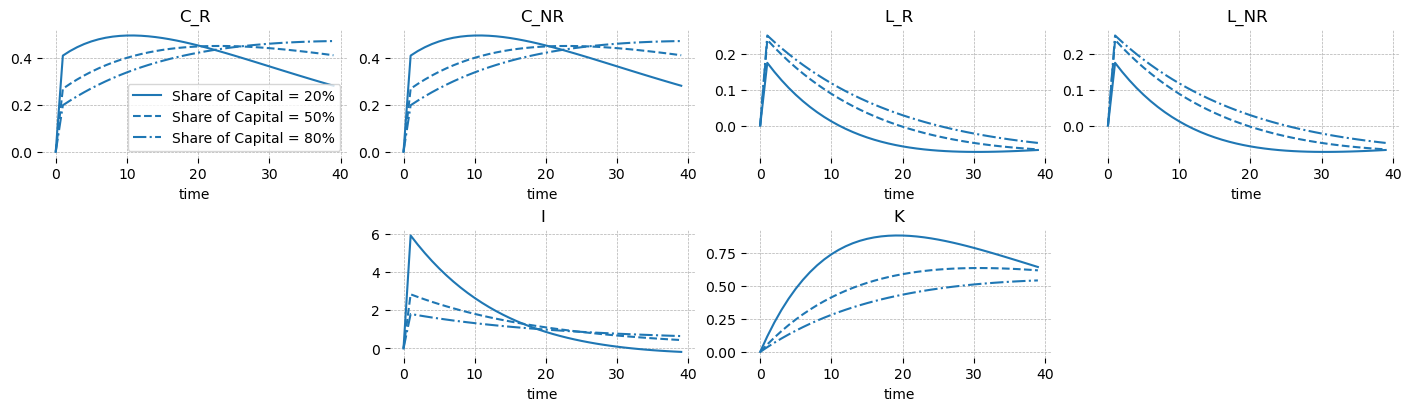

In [7]:
gp.plot_irf(
    {
        f"Share of Capital = {alpha:0.0%}": ge.impulse_response_function(
            mod,
            shock_size={"epsilon_TFP": 1.0},
            verbose=False,
            alpha=alpha,
            steady_state_kwargs={"how": "root", "verbose": False, "progressbar": False},
        )
        for alpha in [0.2, 0.5, 0.8]
    },
    ["C_R", "C_NR", "L_R", "L_NR", "I", "K"],
    figsize=(14, 4),
);